In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches

In [2]:
path = 'iris.data'  # 数据文件路径
data = pd.read_csv(path, header=None)
data[4] = pd.Categorical(data[4]).codes

In [8]:
x, y = np.split(data.values, (4,), axis=1)

In [12]:
# 仅使用前两列特征
x = x[:, :2]

In [14]:
lr = Pipeline([('sc', StandardScaler()),
                ('poly', PolynomialFeatures(degree=3)),
                ('clf', LogisticRegression()) ])
lr.fit(x, y.ravel())

Pipeline(memory=None,
     steps=[('sc', StandardScaler(copy=True, with_mean=True, with_std=True)), ('poly', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('clf', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [15]:
y_hat = lr.predict(x)
y_hat_prob = lr.predict_proba(x)
np.set_printoptions(suppress=True)
print('y_hat = \n', y_hat)
print('y_hat_prob = \n', y_hat_prob)
print('准确度：%.2f%%' % (100*np.mean(y_hat == y.ravel())))

y_hat = 
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2.  2.  2.  1.
  2.  1.  2.  1.  2.  1.  1.  1.  1.  1.  1.  2.  1.  1.  1.  1.  1.  1.
  1.  1.  2.  2.  2.  2.  1.  1.  1.  1.  1.  1.  1.  2.  2.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  2.  1.  2.  1.  2.  2.  1.  2.
  2.  2.  2.  2.  2.  1.  1.  2.  2.  2.  2.  1.  2.  1.  2.  1.  2.  2.
  1.  1.  2.  2.  2.  2.  2.  1.  1.  2.  2.  2.  1.  2.  2.  2.  1.  2.
  2.  2.  1.  2.  2.  1.]
y_hat_prob = 
 [[ 0.9734987   0.01842572  0.00807559]
 [ 0.85503568  0.09538659  0.04957773]
 [ 0.98462023  0.00831339  0.00706638]
 [ 0.98611191  0.00560638  0.00828171]
 [ 0.9948005   0.00333962  0.00185988]
 [ 0.99548688  0.00029168  0.00422144]
 [ 0.99868015  0.00071189  0.00060797]
 [ 0.96797189  0.02298922  0.00903888]
 [ 0.98810484  0.00187161  0.01002355]
 [ 0.90220322 

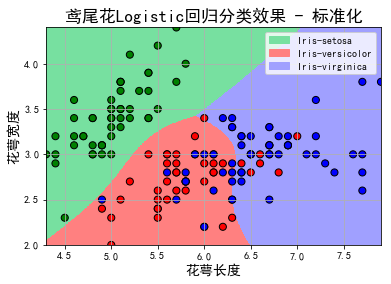

In [17]:
N, M = 500, 500     # 横纵各采样多少个值
x1_min, x1_max = x[:, 0].min(), x[:, 0].max()   # 第0列的范围
x2_min, x2_max = x[:, 1].min(), x[:, 1].max()   # 第1列的范围
t1 = np.linspace(x1_min, x1_max, N)
t2 = np.linspace(x2_min, x2_max, M)
x1, x2 = np.meshgrid(t1, t2)                    # 生成网格采样点
x_test = np.stack((x1.flat, x2.flat), axis=1)   # 测试点
mpl.rcParams['font.sans-serif'] = ['simHei']
mpl.rcParams['axes.unicode_minus'] = False
cm_light = mpl.colors.ListedColormap(['#77E0A0', '#FF8080', '#A0A0FF'])
cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])
y_hat = lr.predict(x_test)                  # 预测值
y_hat = y_hat.reshape(x1.shape)                 # 使之与输入的形状相同
plt.figure(facecolor='w')
plt.pcolormesh(x1, x2, y_hat, cmap=cm_light)     # 预测值的显示
plt.scatter(x[:, 0], x[:, 1], c=y, edgecolors='k', s=50, cmap=cm_dark)    # 样本的显示
plt.xlabel('花萼长度', fontsize=14)
plt.ylabel('花萼宽度', fontsize=14)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.grid()
patchs = [mpatches.Patch(color='#77E0A0', label='Iris-setosa'),
          mpatches.Patch(color='#FF8080', label='Iris-versicolor'),
          mpatches.Patch(color='#A0A0FF', label='Iris-virginica')]
plt.legend(handles=patchs, fancybox=True, framealpha=0.8)
plt.title('鸢尾花Logistic回归分类效果 - 标准化', fontsize=17)
plt.show()

In [18]:
N, M = 500, 500     # 横纵各采样多少个值
x1_min, x1_max = x[:, 0].min(), x[:, 0].max()   # 第0列的范围
x2_min, x2_max = x[:, 1].min(), x[:, 1].max()   # 第1列的范围
t1 = np.linspace(x1_min, x1_max, N)
t2 = np.linspace(x2_min, x2_max, M)
x1, x2 = np.meshgrid(t1, t2)                    # 生成网格采样点